# Implementing Feedforward Neural Networks

**Dataset:** MNIST Dataset **[Loading using CSV]**

Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset using below steps:
1. Import the necessary packages
2. Load the training and testing data
3. Define the network architecture using Keras
4. Train the model using SGD with 11 epochs
5. Evaluate the network
6. Plot the training loss and accuracy

### 1. Import Necessary Packages

We start by importing essential libraries:
- **NumPy:** For handling arrays and data manipulation.
- **Pandas:** To load and manipulate the CSV dataset.
- **TensorFlow and Keras:** To build and train our neural network model.
- **Matplotlib:** For visualizing the training and validation loss and accuracy.
- **`LabelBinarizer` from `sklearn.preprocessing`:** For one-hot encoding labels
- **`classification_report` from `sklearn.metrics`:** Provides a detailed evaluation of the model’s performance for each class, displaying metrics like precision, recall, F1-score, and support.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

### 2. Load the Training and Testing Data

In this step, we load the MNIST dataset from local CSV files and prepare it for training. Each image in the dataset is represented by a row, with the first column as the label and the remaining columns as pixel values.

In this code block, we perform the following steps:
- **Loading Data:** We use `pd.read_csv()` to load the training and testing datasets from local CSV files (`mnist_train.csv` and `mnist_test.csv`).
- **Separating Features and Labels:** The first column contains the labels (digits 0-9), and the remaining columns represent the pixel values of the 28x28 images. The features are separated from the labels using `drop('label', axis=1)` for `x_train` and `x_test`, and the labels are extracted directly into `y_train` and `y_test`.
- **Normalizing Pixel Values:** The pixel values are scaled to the range [0, 1] by dividing by 255. This helps to improve model performance and convergence during training.
- **Reshaping the Data:** The flattened image data (a vector of 784 elements for each image) is reshaped into its original 28x28 form for each image, making it compatible with the expected input format of the model.

This prepares the data for the neural network model, where the pixel values are normalized and reshaped into 28x28 images to be processed.

In [ ]:
# Load training and testing data from CSV
train_data = pd.read_csv("Datasets/MNIST_CSV/mnist_train.csv")
test_data = pd.read_csv("Datasets/MNIST_CSV/mnist_test.csv")

# Separate labels (first column) and features (remaining columns)
x_train = train_data.drop('label', axis=1).values  # Features (flattened 28x28 images)
y_train = train_data['label'].values  # Labels (digits 0-9)

x_test = test_data.drop('label', axis=1).values  # Features
y_test = test_data['label'].values  # Labels

# Normalize the pixel values to range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the images back to (28, 28)
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

### 3. Define the Network Architecture

Here, we define a simple feedforward neural network using Keras with three layers:
1. **Flatten Layer:** This layer flattens the input images (28x28 pixels) into a one-dimensional vector of 784 values to be used as input to the dense layers.
2. **Dense Hidden Layer:** A fully connected layer with 128 neurons, using the ReLU activation function. ReLU introduces non-linearity, which is crucial for learning complex patterns in the data.
3. **Output Dense Layer:** This layer consists of 10 neurons, one for each possible digit (0-9). The softmax activation function is used to output a probability distribution over the 10 classes, where the sum of all probabilities equals 1.

This architecture is a basic fully connected neural network suitable for classification tasks like digit recognition.

In [3]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input image to 1D
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")  # Output layer with 10 classes (0-9)
])

c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 4. Compile and Train the Model

In this step, we compile our model, specifying:
- **Optimizer:** We use Stochastic Gradient Descent (SGD), a simple yet effective optimization algorithm.
- **Loss Function:** Sparse categorical cross-entropy is used, as it works well for multi-class classification tasks.
- **Metrics:** We monitor accuracy during training to evaluate the model's performance.

The model is then trained for 11 epochs on the training data, with validation on the test data.

In [4]:
# Compile the model with SGD optimizer and sparse categorical cross-entropy loss
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 11 epochs
history = model.fit(x_train, y_train, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7022 - loss: 1.0524 - val_accuracy: 0.9128 - val_loss: 0.3190
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9076 - loss: 0.3152 - val_accuracy: 0.9268 - val_loss: 0.2561
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9271 - loss: 0.2560 - val_accuracy: 0.9366 - val_loss: 0.2203
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9401 - loss: 0.2126 - val_accuracy: 0.9465 - val_loss: 0.1885
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9452 - loss: 0.1902 - val_accuracy: 0.9486 - val_loss: 0.1731
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9536 - loss: 0.1632 - val_accuracy: 0.9547 - val_loss: 0.1543
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9577 - loss: 0.1485 - val_accuracy: 0.9610 - val_loss: 0.1387
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9622 - loss: 0.1293 - 

### 5. Evaluate the Model

Now that the model is trained, we evaluate it on the test data to measure how well it generalizes to unseen images. This gives us the test accuracy and test loss.

In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9629 - loss: 0.1275
Test accuracy: 0.9679


#### Make Predictions and Generate a Classification Report

To provide a detailed evaluation, we’ll generate predictions for the test set and display a classification report. This report shows precision, recall, F1-score, and support for each digit, giving a deeper understanding of the model’s performance on each class.

In [6]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Convert predictions and true labels to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test

# Generate a classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.96      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### 6. Plot Training Loss and Accuracy

Finally, we visualize the training and validation loss and accuracy over each epoch. These plots help us understand the model’s learning progress and performance consistency across epochs.

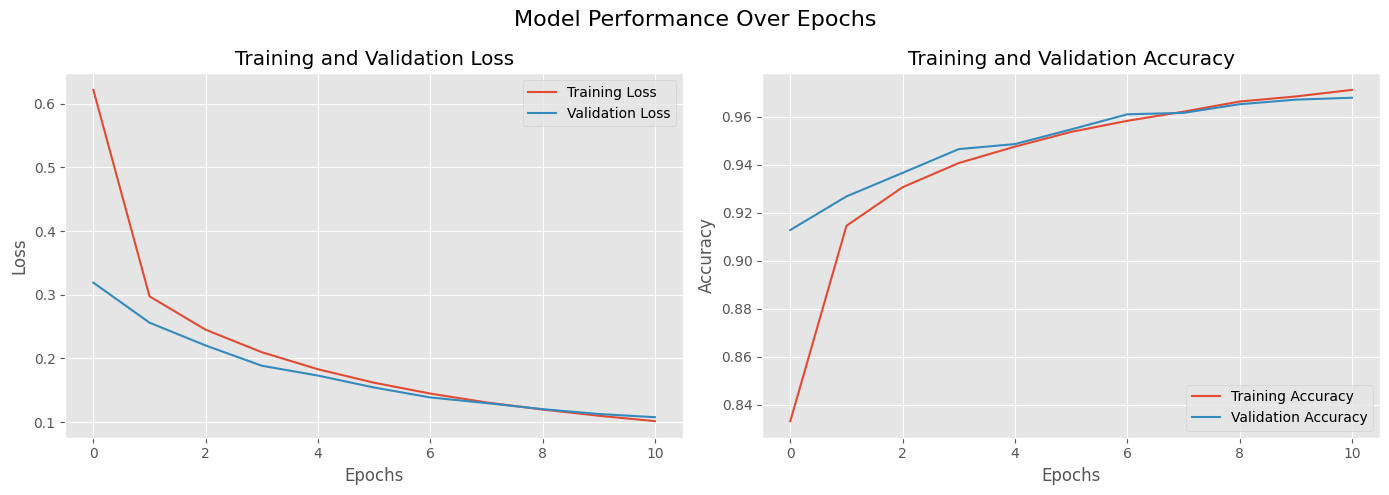

In [7]:
# Plot the training and validation loss and accuracy
plt.style.use("ggplot")  # Use ggplot style for better aesthetics
epochs_range = range(11)  # Number of epochs for x-axis

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
ax1.plot(epochs_range, history.history["loss"], label="Training Loss")
ax1.plot(epochs_range, history.history["val_loss"], label="Validation Loss")
ax1.set_title("Training and Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper right")

# Plot Accuracy
ax2.plot(epochs_range, history.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs_range, history.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower right")

plt.suptitle("Model Performance Over Epochs", fontsize=16)
plt.tight_layout()
plt.show()

#### Visualize Model Prediction on a Single Test Image

To gain insight into the model’s predictions, we’ll visualize a single test image alongside the model's predicted label. This step allows us to manually verify if the predicted label aligns with the content of the image. We use `model.predict()` to get the predicted probabilities for each class and then use `np.argmax()` to identify the class with the highest probability as the predicted label.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


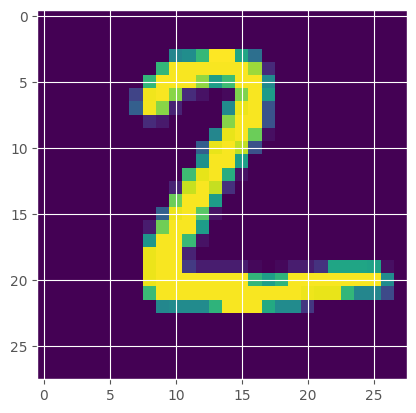

2


In [8]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[1])
plt.show()
print(np.argmax(predicted_value[1], axis=0))